In [1]:
import numpy as np
import pandas as pd
import nltk 

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df=df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1)

df=df.rename(columns={"v1":"Category","v2":"Text"})
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df['length']=df['Text'].apply(len)
df.head()

,Category,Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
import plotly.express as px
fig = px.histogram(df, x='length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [8]:
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)
df.head()

,Category,Text,length,spam
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0


Spam Texts: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr
Ham Texts: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a



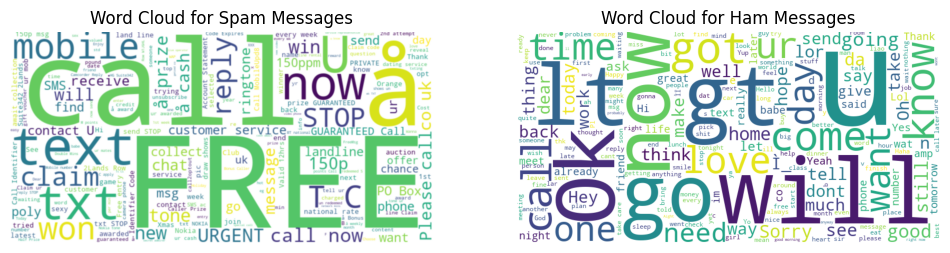

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_texts = ' '.join(df[df['spam'] == 1]['Text'])
ham_texts = ' '.join(df[df['spam'] == 0]['Text'])

print("Spam Texts:", spam_texts[:100]) 
print("Ham Texts:", ham_texts[:100])   
print()

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_texts)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_texts)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='quadric')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='kaiser')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Text, df.spam, test_size=0.2,random_state=100)

In [11]:
X_train[:4]

2747                         Ya had just now.onion roast.
4779    Sen told that he is going to join his uncle fi...
338                                Sorry, I'll call later
507     You should know now. So how's anthony. Are you...
Name: Text, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7793 sparse matrix of type '<class 'numpy.int64'>'
	with 59469 stored elements in Compressed Sparse Row format>

In [13]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
X_train_cv.shape

(4457, 7793)

In [15]:
v.get_feature_names_out()[1771]

'chat'

In [16]:
v.vocabulary_

{'ya': 7692,
 'had': 3324,
 'just': 3911,
 'now': 4881,
 'onion': 4978,
 'roast': 5830,
 'sen': 6030,
 'told': 6979,
 'that': 6838,
 'he': 3396,
 'is': 3779,
 'going': 3205,
 'to': 6963,
 'join': 3874,
 'his': 3472,
 'uncle': 7169,
 'finance': 2890,
 'in': 3677,
 'cbe': 1718,
 'sorry': 6351,
 'll': 4200,
 'call': 1630,
 'later': 4071,
 'you': 7735,
 'should': 6140,
 'know': 4000,
 'so': 6305,
 'how': 3551,
 'anthony': 1002,
 'are': 1065,
 'bringing': 1532,
 'money': 4607,
 've': 7283,
 'school': 5964,
 'fees': 2846,
 'pay': 5154,
 'and': 972,
 'rent': 5731,
 'stuff': 6573,
 'like': 4153,
 'thats': 6841,
 'why': 7531,
 'need': 4771,
 'your': 7741,
 'help': 3428,
 'friend': 3036,
 'huh': 3575,
 'hyde': 3601,
 'park': 5125,
 'not': 4869,
 'mel': 4475,
 'ah': 883,
 'opps': 5004,
 'got': 3234,
 'confused': 1993,
 'anyway': 1017,
 'if': 3634,
 'tt': 7099,
 'best': 1342,
 'choice': 1832,
 'den': 2279,
 'we': 7445,
 'juz': 3915,
 'have': 3386,
 'take': 6720,
 'it': 3790,
 'holla': 3503,
 'at':

In [17]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
np.where(X_train_np[0]!=0)

(array([3324, 3911, 4881, 4978, 5830, 7692], dtype=int64),)

In [19]:
X_train_np[0][1771]

0

In [20]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [21]:
X_test_cv = v.transform(X_test)

In [22]:
model.score(X_test_cv, y_test)

0.9829596412556054

In [23]:
from sklearn.naive_bayes import BernoulliNB

model1 = BernoulliNB()
model1.fit(X_train_cv, y_train)


BernoulliNB()

In [24]:
model1.score(X_test_cv, y_test)

0.9820627802690582

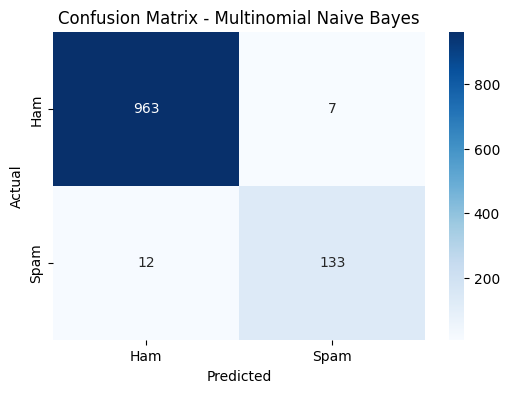

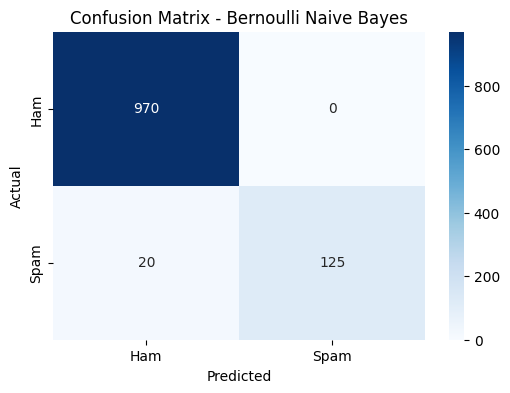

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_mnb = model.predict(X_test_cv)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_mnb, annot=True, cmap='Blues', fmt='g', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

y_pred_bnb = model1.predict(X_test_cv)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bnb, annot=True, cmap='Blues', fmt='g', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.show()


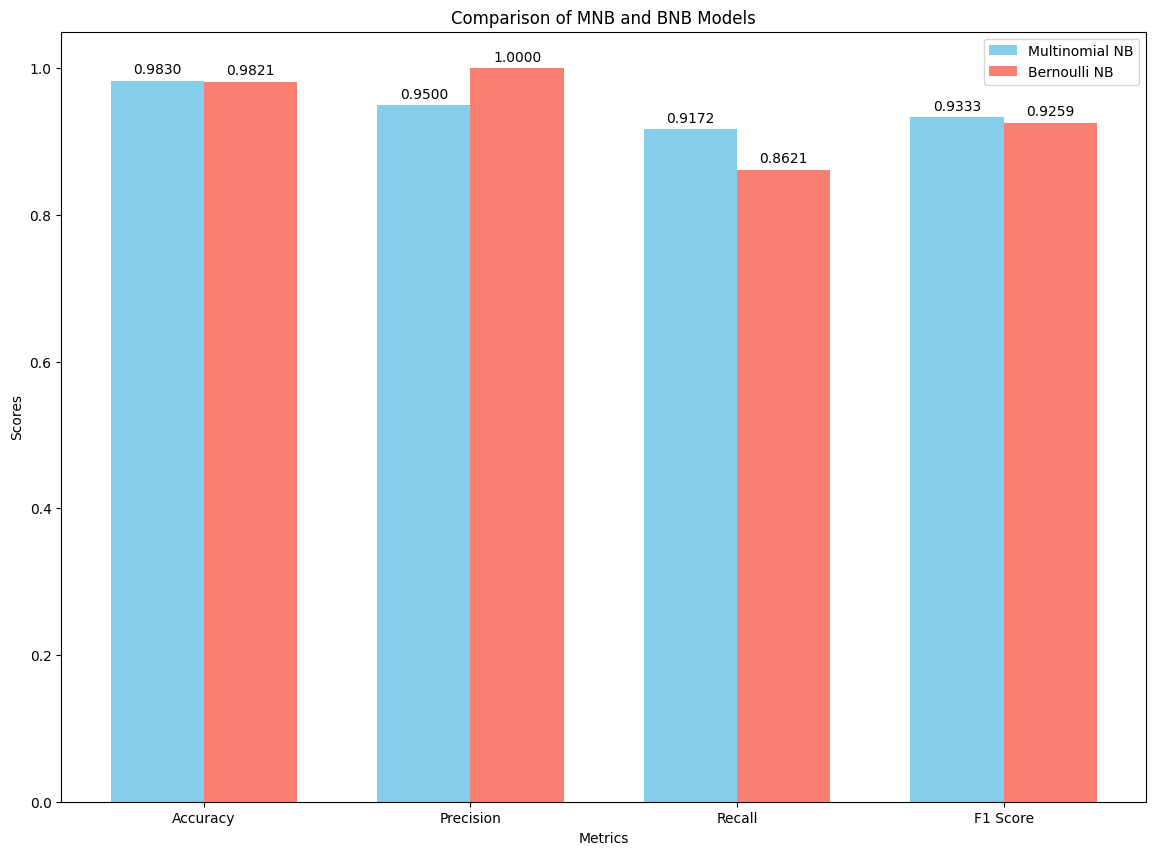

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
recall_mnb = recall_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb)

accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb)
recall_bnb = recall_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
mnb_scores = [accuracy_mnb, precision_mnb, recall_mnb, f1_mnb]
bnb_scores = [accuracy_bnb, precision_bnb, recall_bnb, f1_bnb]

x = np.arange(len(metrics))  
width = 0.35  

fig, ax = plt.subplots(figsize=(14, 10))
rects1 = ax.bar(x - width/2, mnb_scores, width, label='Multinomial NB', color='skyblue')
rects2 = ax.bar(x + width/2, bnb_scores, width, label='Bernoulli NB', color='salmon')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MNB and BNB Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


In [31]:
emails = [
    'Hi there, just wanted to check if you are available for a meeting tomorrow to discuss the project progress. Let me know. Thanks!',
    'Congratulations! You have won a free vacation to Hawaii. Click here to claim your prize now!',
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)